# IRIS Dataset:

- Number of Instances: 150
- Number of Attributes: 5
  - Petal Length, Petal Width, Sepal Length and Sepal width all in **cm**.
  - Class(Species)
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

#### Q. What is Petal Length, Petal Width, Sepal Length and Sepal Width ?    
 
<img src="https://www.oreilly.com/library/view/python-artificial-intelligence/9781789539462/assets/462dc4fa-fd62-4539-8599-ac80a441382c.png" width=400>


<div align="center">
  <a href="https://www.oreilly.com/library/view/python-artificial-intelligence/9781789539462/assets/462dc4fa-fd62-4539-8599-ac80a441382c.png">[Image Source]</a>
</div>

#### Q.What are different types of Iris(Species) which are present in data set ?

<img src="https://miro.medium.com/max/2000/1*nfK3vGZkTa4GrO7yWpcS-Q.png" width=700>

<div align="center">
  <a href="https://miro.medium.com/max/2000/1*nfK3vGZkTa4GrO7yWpcS-Q.png">[Image Source]</a>
</div>

# [Data Preprocessing](https://hackernoon.com/what-steps-should-one-take-while-doing-data-preprocessing-502c993e1caa)

`Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues.`

## [Tasks of Data Preprocessing](https://en.wikipedia.org/wiki/Data_pre-processing)
- Data Cleaning 
- Data Editing
- Data Reduction
- Data Wrangling

In [1]:
#Python Libraries 

import pandas as pd #Data Processing and CSV file I/o

#Ref: https://docs.python.org/3/library/warnings.html
import warnings
warnings.filterwarnings('ignore')

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

#for complex mathematical operations
import numpy as np 

#Label Encoding
from sklearn.preprocessing import LabelEncoder

#Split the Data
from sklearn.model_selection import train_test_split

#Models
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #GNB
from sklearn.linear_model import LogisticRegression #LR
from sklearn.tree import DecisionTreeClassifier #DT
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier #RF
from sklearn.svm import LinearSVC #Linear SVC
from xgboost import XGBClassifier #XGB

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
#Dataset: https://www.kaggle.com/arshid/iris-flower-dataset
iris_df = pd.read_csv('archive.zip') #reading zip file where IRIS.csv(only) file is present
iris_df.head(8) #8 rows from top 

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa

In [3]:
#Data points and Features 
iris_df.shape

(150, 5)

In [4]:
#Concise Summary of the DataFrame
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#Statistical Summary of DataFrame
iris_df.describe(include='all')

sepal_length  sepal_width  petal_length  petal_width          species
count     150.000000   150.000000    150.000000   150.000000              150
unique           NaN          NaN           NaN          NaN                3
top              NaN          NaN           NaN          NaN  Iris-versicolor
freq             NaN          NaN           NaN          NaN               50
mean        5.843333     3.054000      3.758667     1.198667              NaN
std         0.828066     0.433594      1.764420     0.763161              NaN
min         4.300000     2.000000      1.000000     0.100000              NaN
25%         5.100000     2.800000      1.600000     0.300000              NaN
50%         5.800000     3.000000      4.350000     1.300000              NaN
75%         6.400000     3.300000      5.100000     1.800000              NaN
max         7.900000     4.400000      6.900000     2.500000              NaN

In [6]:
#Missing Values
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
#Checking Wheather this dataset has Duplicate Values or not
sum(iris_df.duplicated())

3

In [8]:
iris_duplicate = iris_df[iris_df.duplicated()]
iris_duplicate

sepal_length  sepal_width  petal_length  petal_width         species
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica

## [Data cleansing](https://en.wikipedia.org/wiki/Data_cleansing)

`Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.`



```python:

iris_duplicate.info()

iris_df[iris_df['sepal_length'] == 4.9]

iris_updated = iris_df.drop_duplicates() #droping duplicates
iris_updated[iris_df['sepal_length'] == 4.9] #cross checking

sum(iris_updated.duplicated())#No duplicate remain

```

- `Because of the small dataset it is not wise to clean the dataset(In my opinion). But you can refer to above code snippet for Data Cleaning.`

In [9]:
#if you are not running above code snippet then run this otherwise comment it
iris_updated = iris_df

# [Exploratory Data Analysis(EDA)](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

- `Exploratory Data Analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.`
- `Exploratory data analysis is cross-classified in two different ways where each method is either graphical or non-graphical. And then, each method is either univariate, bivariate or multivariate.`

## Univariate Analysis

`Uni means one and variate means variable, so in univariate analysis, there is only one dependable variable. The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it. In a dataset, it explores each variable separately. It is possible for two kinds of variables- Categorical and Numerical.`

### Univariate data can be described through:
- Frequency Distribution Tables
- Bar Charts
- Histograms
- Pie Charts

## Bivariate Analysis

`Bi means two and variate means variable, so here there are two variables. The analysis is related to cause and the relationship between the two variables. There are three types of bivariate analysis.`

### Bivariate Analysis of two Numerical Variables (Numerical-Numerical):
- Scatter Plot

### Bivariate Analysis of two categorical Variables (Categorical-Categorical):
- Chi-square Test

### Bivariate Analysis of one numerical and one categorical variable (Numerical-Categorical):
- Z-test and t-test
- Analysis of Variance (Anova)

## Multivariate Analysis

`Multivariate analysis is required when more than two variables have to be analyzed simultaneously. It is a tremendously hard task for the human brain to visualize a relationship among 4 variables in a graph and thus multivariate analysis is used to study more complex sets of data. Types of Multivariate Analysis include Cluster Analysis, Factor Analysis, Multiple Regression Analysis, Principal Component Analysis, etc.`


Ref:
- https://www.analyticsvidhya.com/blog/2021/04/exploratory-analysis-using-univariate-bivariate-and-multivariate-analysis-techniques/
- https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/

In [10]:
print(iris_updated.info())
print('='*80)
print(iris_updated.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
        sepal_length  sepal_width  petal_length  petal_width          species
count     150.000000   150.000000    150.000000   150.000000              150
unique           NaN          NaN           NaN          NaN                3
top              NaN          NaN           NaN          NaN  Iris-versicolor
freq             NaN          NaN           NaN          NaN               50
mean        5.843333     3.054000      3.758667     1.198667              NaN
std         0.828066     0.433594      1.764420     0.763161          

## [Scatter Plot](https://en.wikipedia.org/wiki/Scatter_plot)

`A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.`


Additional Reference: https://chartio.com/learn/charts/what-is-a-scatter-plot/

### 2D Scatter Plot

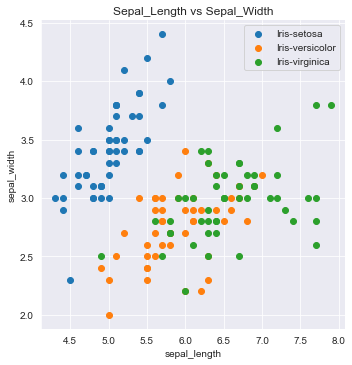

In [11]:
#2D Scatter plot between Sepal_Length and Sepal_Width
sns.set_style('darkgrid')
sns.FacetGrid(iris_updated, hue='species', height=5).map(plt.scatter, 'sepal_length', 'sepal_width')
plt.legend() #Adding Legend
plt.title('Sepal_Length vs Sepal_Width')
plt.show()

### 3D Scatter Plot

In [12]:
#3D Scatter plot between Sepal_Length, Sepal_Width and Petal_Length
#ref: https://plotly.com/python/3d-scatter-plots/
fig = px.scatter_3d(iris_updated, x='sepal_length', y='sepal_width', z='petal_length', color='species')
fig.show()

## [Pair Plots](https://seaborn.pydata.org/generated/seaborn.pairplot.html)


`Plot pairwise relationships in a dataset.`

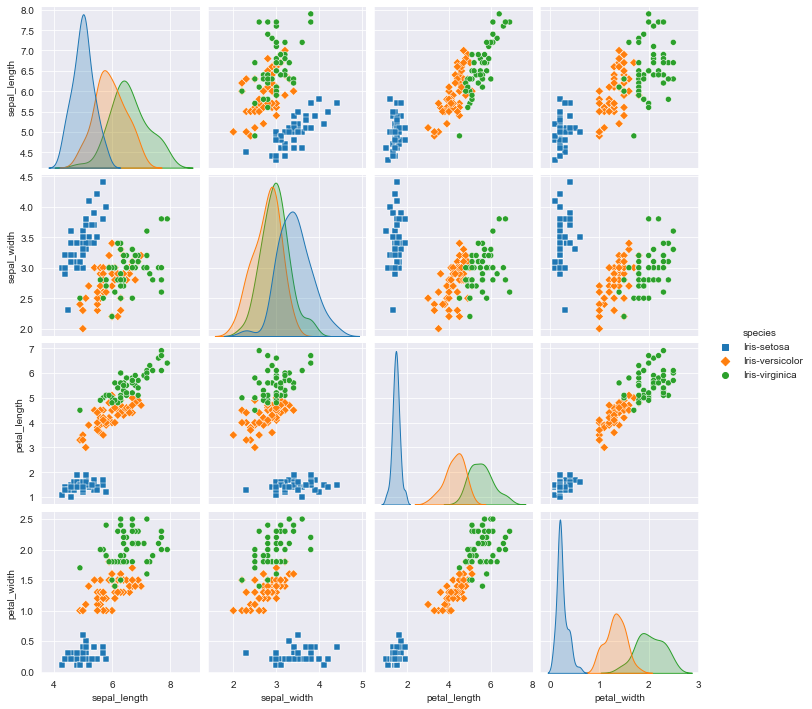

In [13]:
#ref: https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.set_style('darkgrid')
sns.pairplot(iris_updated, hue="species", markers=["s", "D", "o"])
plt.show();

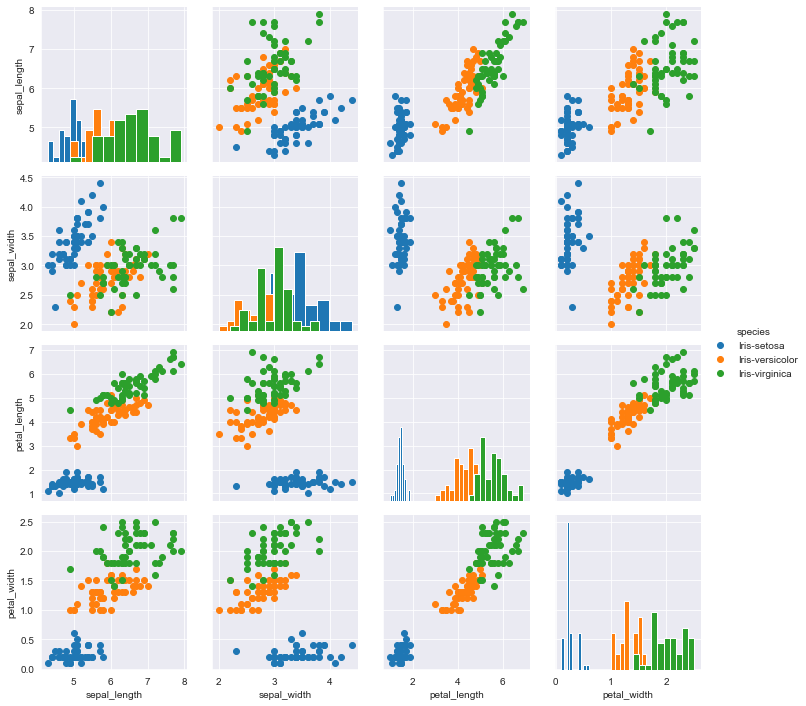

In [14]:
#PairGrid Plot
#ref: https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid
fig = sns.PairGrid(iris_updated, hue="species")
fig.map_diag(plt.hist)
fig.map_offdiag(plt.scatter)
fig.add_legend()
plt.show();

## [Box Plot](https://en.wikipedia.org/wiki/Box_plot)

`Box plot or Boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.`

<img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png" width=400>

<div align="center">
  <a href="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png">[Image Source]</a>
</div>

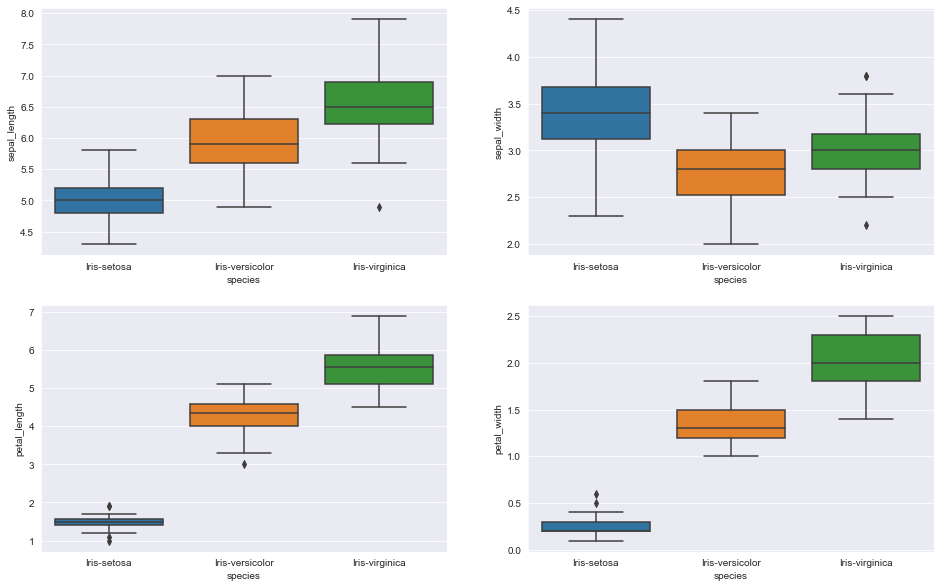

In [15]:
#ref: https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.figure(figsize=(16,10)) #(width,height)
plt.subplot(2,2,1) #(row, column, plot_number)
#The figure has 2 row, 2 columns, and this plot is the first plot. 
sns.boxplot(x='species', y='sepal_length', data=iris_updated);
plt.subplot(2,2,2)
#The figure has 2 row, 2 columns, and this plot is the second plot.
sns.boxplot(x='species', y='sepal_width', data=iris_updated);
plt.subplot(2,2,3)
#The figure has 2 row, 2 columns, and this plot is the third plot.
sns.boxplot(x='species', y='petal_length', data=iris_updated);
plt.subplot(2,2,4)
#The figure has 2 row, 2 columns, and this plot is the fourth plot.
sns.boxplot(x='species', y='petal_width', data=iris_updated);

## [Violin Plot](https://en.wikipedia.org/wiki/Violin_plot)

`Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high.` 

<img src='https://datavizcatalogue.com/methods/images/anatomy/SVG/violin_plot.svg' width=400>

<div align="center">
  <a href="https://datavizcatalogue.com/methods/images/anatomy/SVG/violin_plot.svg">[Image Source]</a>
</div>

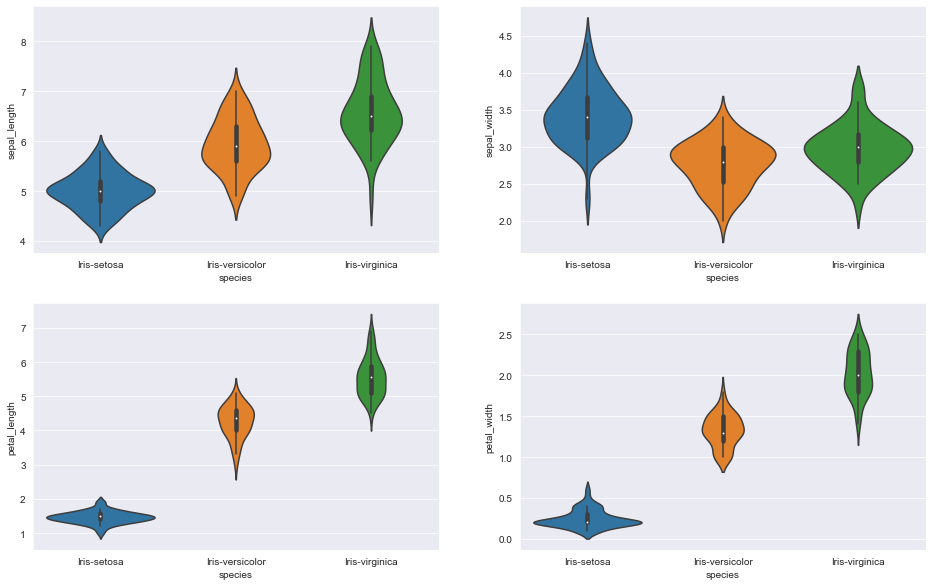

In [16]:
#ref: https://seaborn.pydata.org/generated/seaborn.violinplot.html
plt.figure(figsize=(16,10)) #(width,height)
plt.subplot(2,2,1) #(row, column, plot_number)
sns.violinplot(x='species', y='sepal_length', data=iris_updated);
plt.subplot(2,2,2)
sns.violinplot(x='species', y='sepal_width', data=iris_updated);
plt.subplot(2,2,3)
sns.violinplot(x='species', y='petal_length', data=iris_updated);
plt.subplot(2,2,4)
sns.violinplot(x='species', y='petal_width', data=iris_updated);

## [Pie Chart](https://en.wikipedia.org/wiki/Pie_chart)

`A pie chart (or a circle chart) is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice (and consequently its central angle and area), is proportional to the quantity it represents.`


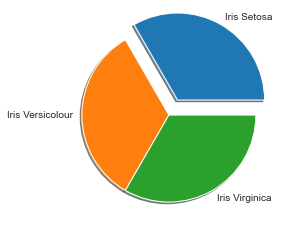

In [17]:
#ref: https://www.w3schools.com/python/matplotlib_pie_charts.asp
mylabels = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']
myexplode = [0.2, 0, 0]
plt.pie(iris_updated['species'].value_counts(), labels=mylabels, explode=myexplode, shadow = True)
#plt.legend()
plt.show()

## [BAR CHART](https://en.wikipedia.org/wiki/Bar_chart)

`A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart. `

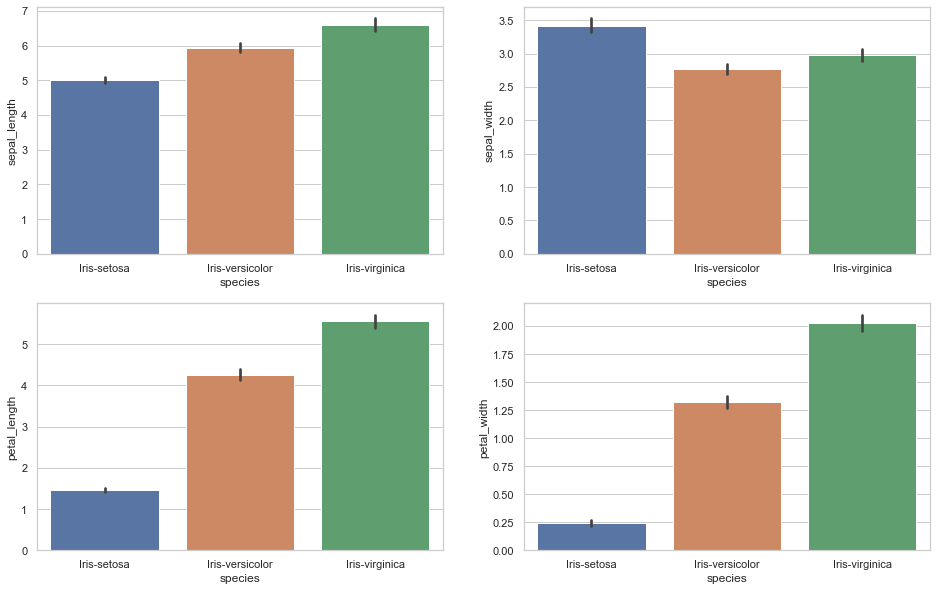

In [18]:
#ref: https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16,10)) #(width,height)
plt.subplot(2,2,1) #(row, column, plot_number)
sns.barplot(x='species', y='sepal_length', data=iris_updated);
plt.subplot(2,2,2)
sns.barplot(x='species', y='sepal_width', data=iris_updated);
plt.subplot(2,2,3)
sns.barplot(x='species', y='petal_length', data=iris_updated);
plt.subplot(2,2,4)
sns.barplot(x='species', y='petal_width', data=iris_updated);

## [Swarm Plot](https://www.geeksforgeeks.org/swarmplot-using-seaborn-in-python/)

`Seaborn swarmplot is probably similar to stripplot, only the points are adjusted so it won’t get overlap to each other as it helps to represent the better representation of the distribution of values. A swarm plot can be drawn on its own, but it is also a good complement to a box, preferable because the associated names will be used to annotate the axes. This type of plot sometimes known as “beeswarm”.`



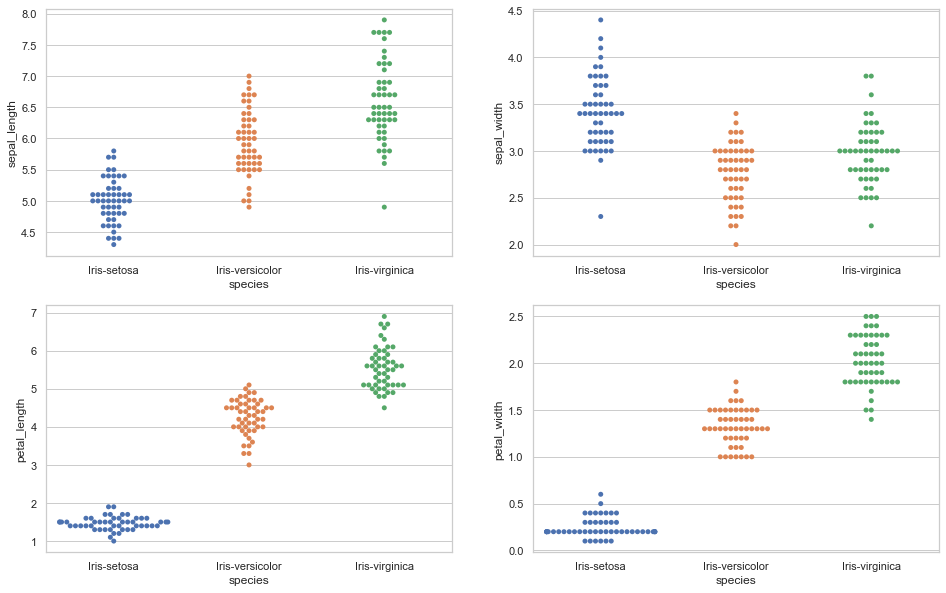

In [19]:
#ref: https://seaborn.pydata.org/generated/seaborn.swarmplot.html
plt.figure(figsize=(16,10)) #(width,height)
plt.subplot(2,2,1) #(row, column, plot_number)
sns.swarmplot(x='species', y='sepal_length', data=iris_updated);
plt.subplot(2,2,2)
sns.swarmplot(x='species', y='sepal_width', data=iris_updated);
plt.subplot(2,2,3)
sns.swarmplot(x='species', y='petal_length', data=iris_updated);
plt.subplot(2,2,4)
sns.swarmplot(x='species', y='petal_width', data=iris_updated);

## [Strip Plot](https://seaborn.pydata.org/generated/seaborn.stripplot.html)

`A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.`


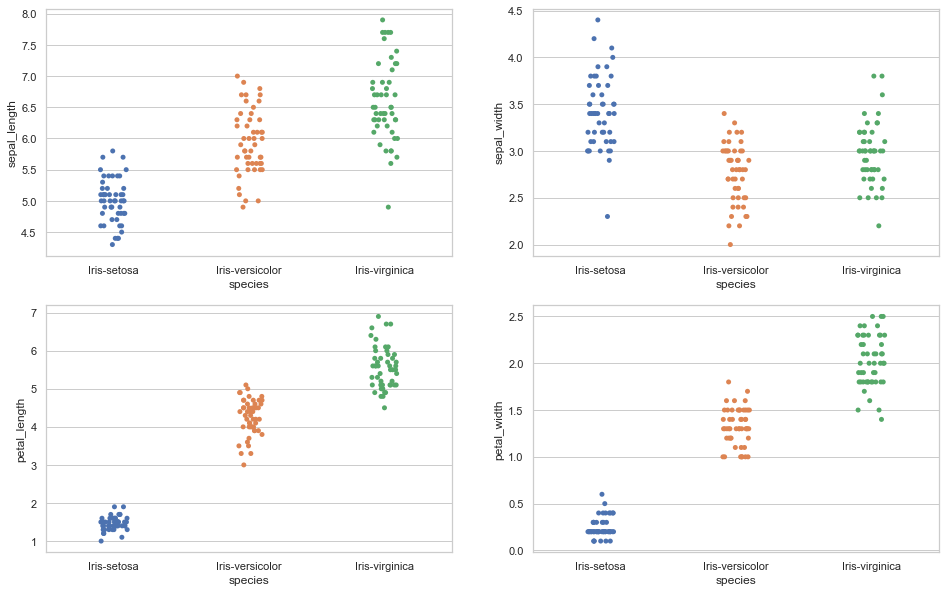

In [20]:
plt.figure(figsize=(16,10)) #(width,height)
plt.subplot(2,2,1) #(row, column, plot_number)
sns.stripplot(x='species', y='sepal_length', data=iris_updated);
plt.subplot(2,2,2)
sns.stripplot(x='species', y='sepal_width', data=iris_updated);
plt.subplot(2,2,3)
sns.stripplot(x='species', y='petal_length', data=iris_updated);
plt.subplot(2,2,4)
sns.stripplot(x='species', y='petal_width', data=iris_updated);

## [Line Plot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

` It is a basic type of chart common in many fields. It is similar to a scatter plot except that the measurement points are ordered (typically by their x-axis value) and joined with straight line segments. `

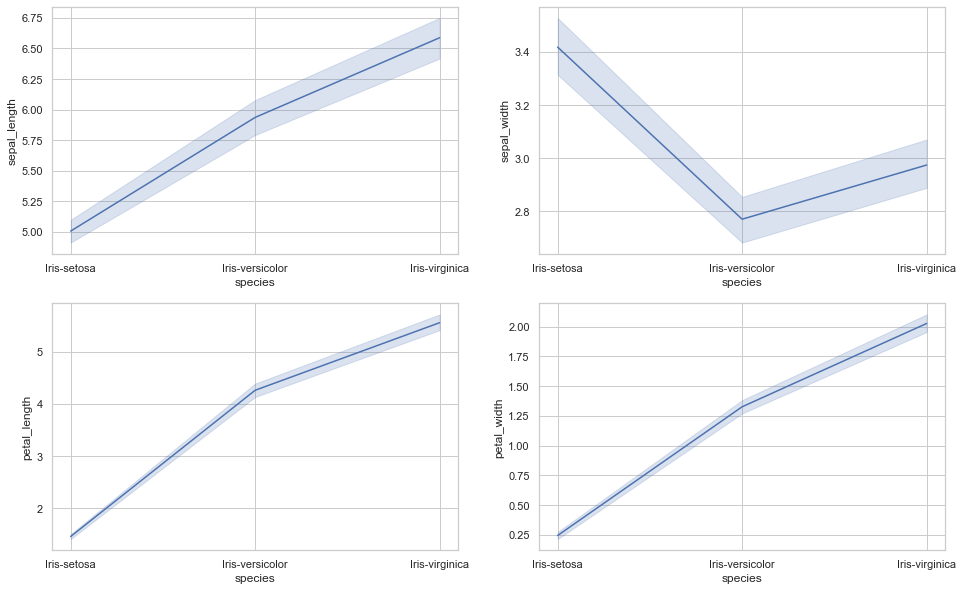

In [21]:
plt.figure(figsize=(16,10)) #(width,height)
plt.subplot(2,2,1) #(row, column, plot_number)
sns.lineplot(x='species', y='sepal_length', data=iris_updated);
plt.subplot(2,2,2)
sns.lineplot(x='species', y='sepal_width', data=iris_updated);
plt.subplot(2,2,3)
sns.lineplot(x='species', y='petal_length', data=iris_updated);
plt.subplot(2,2,4)
sns.lineplot(x='species', y='petal_width', data=iris_updated);

## [Area Plot](https://en.wikipedia.org/wiki/Area_chart)

`An area chart or area graph displays graphically quantitative data. It is based on the line chart. The area between axis and line are commonly emphasized with colors, textures and hatchings. Commonly one compares two or more quantities with an area chart. `

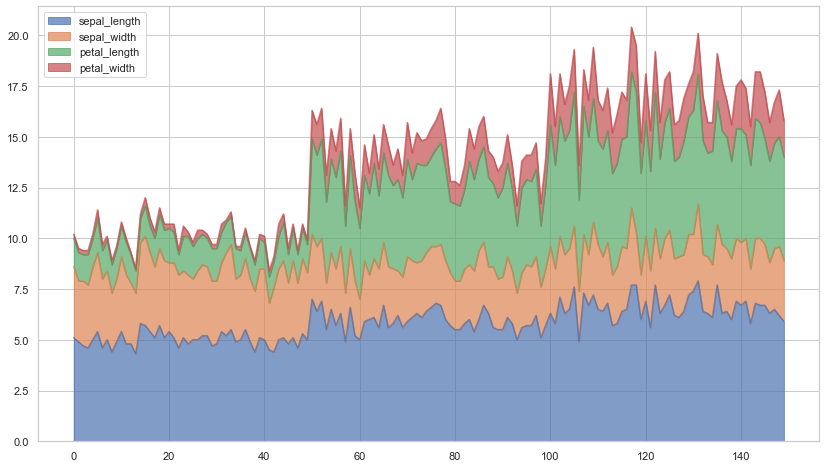

In [22]:
#ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html
iris_updated.plot.area(y=['sepal_length','sepal_width','petal_length','petal_width'], alpha=0.7, figsize=(14, 8));
#alpha = transparency of colors in plot

## [Correlation](https://www.w3schools.com/datascience/ds_stat_correlation.asp)

`Correlation measures the relationship between two variables.`

<img src="https://www.mathsisfun.com/data/images/correlation-examples.svg" width=800>

<div align="center">
  <a href="https://www.mathsisfun.com/data/correlation.html">[Image Source]</a>
</div>

In [23]:
iris_updated.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

### [Heat Map](https://en.wikipedia.org/wiki/Heat_map)

`A heat map (or heatmap) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.`

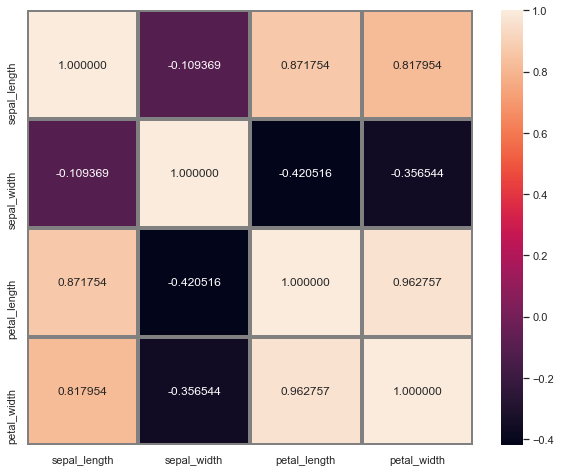

In [24]:
#ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize=(10,8))
sns.heatmap(iris_updated.corr(), annot=True, fmt="f", linewidths=3, linecolor='grey');
#Annot = write the data value in each cell
#fmt = String formatting code to use when adding annotations {f = float/ d = int}

## PDF and CDF

### [Probability Density Function](https://en.wikipedia.org/wiki/Probability_density_function)

`A probability density function (PDF), or density of a continuous random variable, is a function whose value at any given sample (or point) in the sample space (the set of possible values taken by the random variable) can be interpreted as providing a relative likelihood that the value of the random variable would equal that sample.`

${\Large P(x) = \frac{1}{(\sqrt{2\pi}) \sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}}$ 

### [Cumulative Distribution Function](https://en.wikipedia.org/wiki/Cumulative_distribution_function)

`Cumulative distribution function (CDF) of a real-valued random variable X, or just distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x.`

${\Large P(x) = \frac{1}{2}[1 + Erf(\frac{x-\mu}{\sigma\sqrt{2}})]}$

Ref:
- https://en.wikipedia.org/wiki/Likelihood_function
- https://stats.stackexchange.com/questions/187828/how-are-the-error-function-and-standard-normal-distribution-function-related
- https://en.wikipedia.org/wiki/Error_function


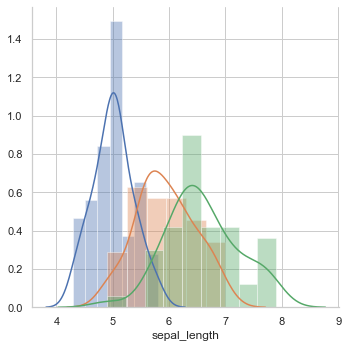

In [25]:
#ref: https://seaborn.pydata.org/generated/seaborn.distplot.html
#pdf
fig = sns.FacetGrid(iris_updated, hue="species", height=5)
fig.map(sns.distplot, "sepal_length");

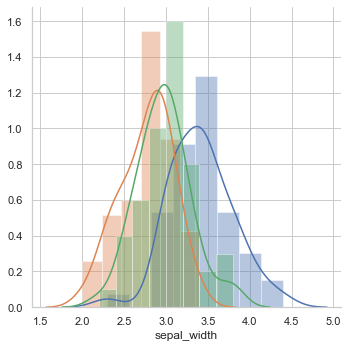

In [26]:
fig = sns.FacetGrid(iris_updated, hue="species", height=5)
fig.map(sns.distplot, "sepal_width");

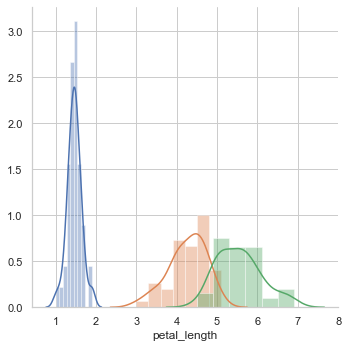

In [27]:
fig = sns.FacetGrid(iris_updated, hue="species", height=5)
fig.map(sns.distplot, "petal_length");

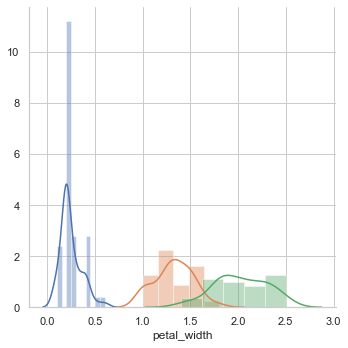

In [28]:
fig = sns.FacetGrid(iris_updated, hue="species", height=5)
fig.map(sns.distplot, "petal_width");

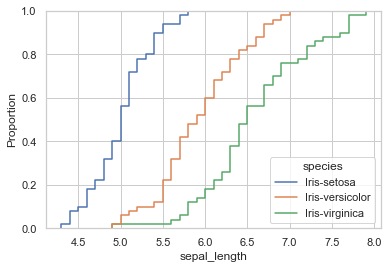

In [29]:
#ref: https://seaborn.pydata.org/generated/seaborn.ecdfplot.html
#cdf
sns.ecdfplot(data=iris_updated, x="sepal_length", hue="species");

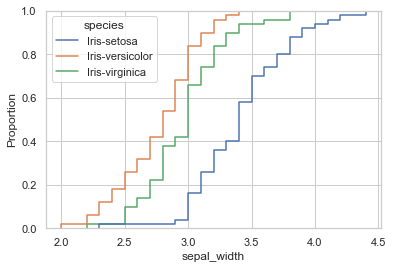

In [30]:
sns.ecdfplot(data=iris_updated, x="sepal_width", hue="species");

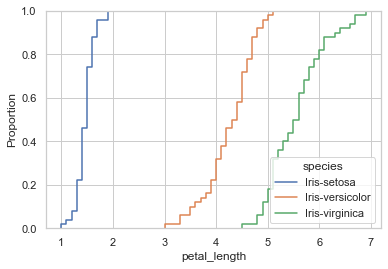

In [31]:
sns.ecdfplot(data=iris_updated, x="petal_length", hue="species");

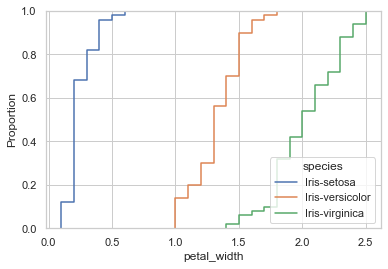

In [32]:
sns.ecdfplot(data=iris_updated, x="petal_width", hue="species");

# Building Machine Learning Models


In [33]:
#Dividing data into features and labels
X=iris_updated.iloc[:,0:4].values
y=iris_updated.iloc[:,4].values
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [34]:
print(X[:10])
print('='*20)
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [35]:
le = LabelEncoder()
y = le.fit_transform(y)

In [36]:
print(y[:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [37]:
#Train and Test Split
#ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#ref: https://scikit-learn.org/stable/glossary.html#term-random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

- `Scikit-learn has a function we can use called ‘train_test_split’ that makes it easy for us to split our dataset into training and testing data. ‘train_test_split’ takes in 5 parameters. The first two parameters are the feature and species data we split up earlier. Next, we will set ‘test_size’ to 0.2. This means that 20% of all the data will be used for testing, which leaves 80% of the data as training data for the model to learn from. Setting ‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results. Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable.`

In [38]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (120, 4)
Number of data points in test data : (30, 4)


## [K-Nearest Neighbors(knn)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

- `k-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically.`
- `Both for classification and regression, a useful technique can be to assign weights to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. `

In [39]:
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn = KNeighborsClassifier(n_neighbors=3) #Model instance
knn.fit(X_train, y_train) #fit model
Y_pred_knn = knn.predict(X_test)

In [40]:
#check accuracy of our model on the test data
knn.score(X_test,Y_pred_knn)

1.0

In [41]:
#Arrays to store training and test accuracies
neighbors = np.arange(1,25)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)#fit the model
    train_accuracy[i] = knn.score(X_train, y_train)#Compute accuracy on the training set
    test_accuracy[i] = knn.score(X_test, y_test)#Compute accuracy on the test set

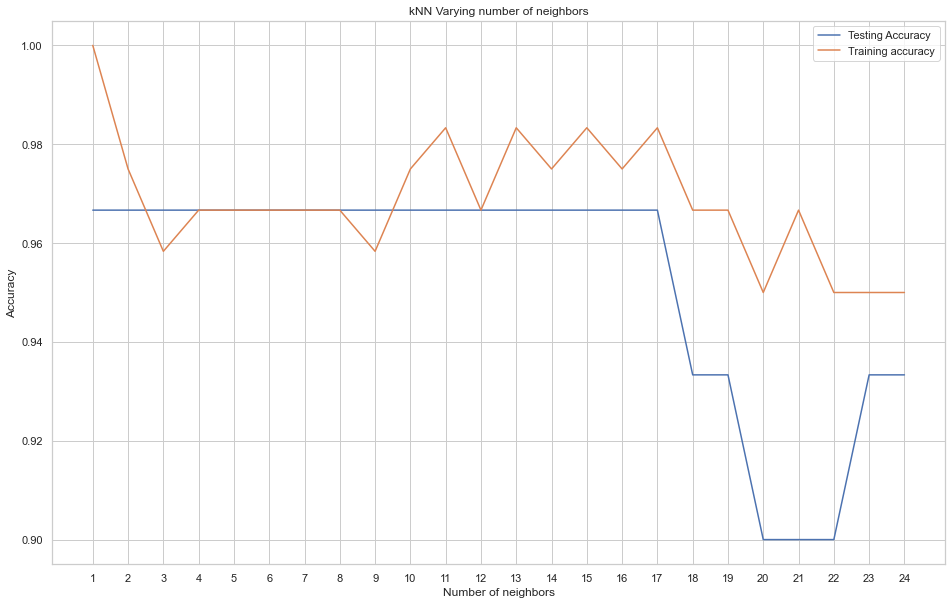

In [42]:
plt.figure(figsize=(16,10))
plt.title('kNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.xticks(np.arange(1,25))
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [43]:
knn = KNeighborsClassifier(n_neighbors=13) #Model instance
knn.fit(X_train, y_train) #fit model
Y_pred_knn = knn.predict(X_test)
knn.score(X_test,Y_pred_knn)#check accuracy of our model on the test data

1.0

In [44]:
#Metrics for k-NN
#https://en.wikipedia.org/wiki/Confusion_matrix
#https://en.wikipedia.org/wiki/Accuracy_and_precision
#https://en.wikipedia.org/wiki/Precision_and_recall
knn_ConfusionMatrix = confusion_matrix(y_test, Y_pred_knn)
knn_Accuracy = accuracy_score(y_test, Y_pred_knn)
knn_PrecisionScore = precision_score(y_test, Y_pred_knn, average='micro')
knn_Recall = recall_score(y_test, Y_pred_knn, average='micro')
knn_F1 = f1_score(y_test, Y_pred_knn, average='micro')


print('Confusion Matrix for k-NN: \n', knn_ConfusionMatrix)
print('='*20)
print(pd.crosstab(y_test, Y_pred_knn, rownames=['True'], colnames=['Predicted'], margins=True))
print('='*20)
print('Accuracy Score: {}'.format(round(knn_Accuracy, 2)))
print('Precision Score: {}'.format(round(knn_PrecisionScore, 2)))
print('Recall Score: {}'.format(round(knn_Recall, 2)))
print('F1 Score: {}'.format(round(knn_F1, 2)))

Confusion Matrix for k-NN: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Predicted   0   1  2  All
True                     
0          10   0  0   10
1           0  10  0   10
2           0   1  9   10
All        10  11  9   30
Accuracy Score: 0.97
Precision Score: 0.97
Recall Score: 0.97
F1 Score: 0.97


In [45]:
print(classification_report(y_test,Y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

`Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.  `

In [46]:
#ref: https://scikit-learn.org/stable/modules/naive_bayes.html
gnb = GaussianNB() #Model instance
gnb.fit(X_train, y_train) #fit model
Y_Pred_gnb = gnb.predict(X_test)
gnb.score(X_test,Y_Pred_gnb) #check accuracy of our model on the test data

1.0

In [47]:
#Metrics for GNB
gnb_ConfusionMatrix = confusion_matrix(y_test, Y_Pred_gnb)
gnb_Accuracy = accuracy_score(y_test, Y_Pred_gnb)
gnb_Precision = precision_score(y_test, Y_Pred_gnb, average='micro')
gnb_Recall = recall_score(y_test, Y_Pred_gnb, average='micro')
gnb_F1 = f1_score(y_test, Y_Pred_gnb, average='micro')


print('Confusion Matrix for GNB: \n', gnb_ConfusionMatrix)
print('='*20)
print(pd.crosstab(y_test, Y_Pred_gnb, rownames=['True'], colnames=['Predicted'], margins=True))
print('='*20)
print('Accuracy Score: {}'.format(round(gnb_Accuracy, 2)))
print('Precision Score: {}'.format(round(gnb_Precision, 2)))
print('Recall Score: {}'.format(round(gnb_Recall, 2)))
print('F1 Score: {}'.format(round(gnb_F1, 2)))

Confusion Matrix for GNB: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Predicted   0   1  2  All
True                     
0          10   0  0   10
1           0  10  0   10
2           0   1  9   10
All        10  11  9   30
Accuracy Score: 0.97
Precision Score: 0.97
Recall Score: 0.97
F1 Score: 0.97


## [Logistic Regression](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)

- `Logistic regression is named for the function used at the core of the method, the logistic function.`

- `The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.`

```1 / (1 + e^-value)```

In [48]:
#ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lr = LogisticRegression(solver= 'lbfgs',max_iter=1000)
lr.fit(X_train, y_train)
Y_Pred_lr = lr.predict(X_test)

In [49]:
#Metrics for LR
lr_ConfusionMatrix = confusion_matrix(y_test, Y_Pred_lr)
lr_Accuracy = accuracy_score(y_test, Y_Pred_lr)
lr_Precision = precision_score(y_test, Y_Pred_lr, average='micro')
lr_Recall = recall_score(y_test, Y_Pred_lr, average='micro')
lr_F1 = f1_score(y_test, Y_Pred_lr, average='micro')


print('Confusion Matrix for LR: \n', lr_ConfusionMatrix)
print('='*20)
print(pd.crosstab(y_test, Y_Pred_lr, rownames=['True'], colnames=['Predicted'], margins=True))
print('='*20)
print('Accuracy Score: {}'.format(round(lr_Accuracy, 2)))
print('Precision Score: {}'.format(round(lr_Precision, 2)))
print('Recall Score: {}'.format(round(lr_Recall, 2)))
print('F1 Score: {}'.format(round(lr_F1, 2)))

Confusion Matrix for LR: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Predicted   0   1  2  All
True                     
0          10   0  0   10
1           0  10  0   10
2           0   1  9   10
All        10  11  9   30
Accuracy Score: 0.97
Precision Score: 0.97
Recall Score: 0.97
F1 Score: 0.97


## [Decision Tree](https://www.xoriant.com/blog/product-engineering/decision-trees-machine-learning-algorithm.html)

`Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves. The leaves are the decisions or the final outcomes. And the decision nodes are where the data is split.`

In [50]:
#ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
Y_Pred_dt = dt.predict(X_test)
dt.score(X_test, Y_Pred_dt)

1.0

In [51]:
#Metrics for DT
dt_ConfusionMatrix = confusion_matrix(y_test, Y_Pred_dt)
dt_Accuracy = accuracy_score(y_test, Y_Pred_dt)
dt_Precision = precision_score(y_test, Y_Pred_dt, average='micro')
dt_Recall = recall_score(y_test, Y_Pred_dt, average='micro')
dt_F1 = f1_score(y_test, Y_Pred_dt, average='micro')


print('Confusion Matrix for DT: \n', dt_ConfusionMatrix)
print('='*20)
print(pd.crosstab(y_test, Y_Pred_dt, rownames=['True'], colnames=['Predicted'], margins=True))
print('='*20)
print('Accuracy Score: {}'.format(round(dt_Accuracy, 2)))
print('Precision Score: {}'.format(round(dt_Precision, 2)))
print('Recall Score: {}'.format(round(dt_Recall, 2)))
print('F1 Score: {}'.format(round(dt_F1, 2)))

Confusion Matrix for DT: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Predicted   0   1  2  All
True                     
0          10   0  0   10
1           0  10  0   10
2           0   1  9   10
All        10  11  9   30
Accuracy Score: 0.97
Precision Score: 0.97
Recall Score: 0.97
F1 Score: 0.97


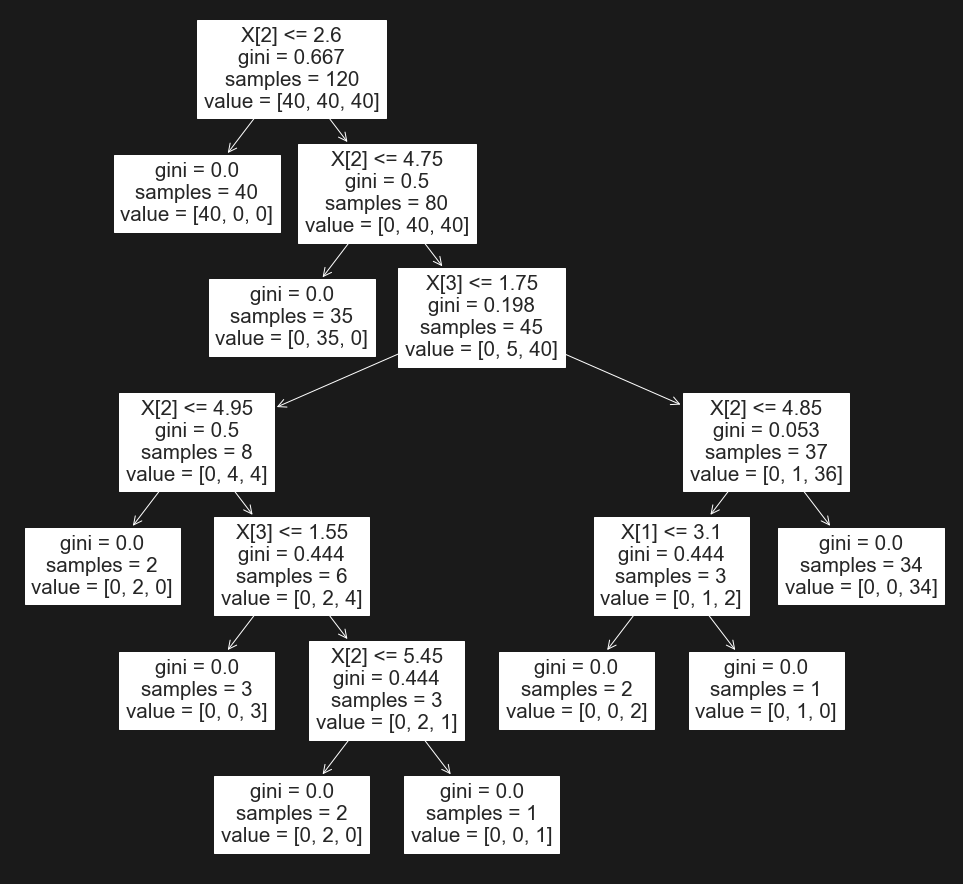

In [52]:
#ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
#ref: https://github.com/scikit-learn/scikit-learn/issues/13971
fig, ax = plt.subplots(figsize=(17, 16), facecolor='k')
tree.plot_tree(dt.fit(X_train, y_train), ax=ax);
plt.show();

## [Random Forests](https://en.wikipedia.org/wiki/Random_forest)

`Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned. Random decision forests correct for decision trees' habit of overfitting to their training set. Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance.`

In [53]:
#ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
Y_Pred_rf = rf.predict(X_test)
rf.score(X_test, Y_Pred_rf)

1.0

In [54]:
#Metrics for RF
rf_ConfusionMatrix = confusion_matrix(y_test, Y_Pred_rf)
rf_Accuracy = accuracy_score(y_test, Y_Pred_rf)
rf_Precision = precision_score(y_test, Y_Pred_rf, average='micro')
rf_Recall = recall_score(y_test, Y_Pred_rf, average='micro')
rf_F1 = f1_score(y_test, Y_Pred_rf, average='micro')


print('Confusion Matrix for RF: \n', rf_ConfusionMatrix)
print('='*20)
print(pd.crosstab(y_test, Y_Pred_dt, rownames=['True'], colnames=['Predicted'], margins=True))
print('='*20)
print('Accuracy Score: {}'.format(round(rf_Accuracy, 2)))
print('Precision Score: {}'.format(round(rf_Precision, 2)))
print('Recall Score: {}'.format(round(rf_Recall, 2)))
print('F1 Score: {}'.format(round(rf_F1, 2)))

Confusion Matrix for RF: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Predicted   0   1  2  All
True                     
0          10   0  0   10
1           0  10  0   10
2           0   1  9   10
All        10  11  9   30
Accuracy Score: 0.97
Precision Score: 0.97
Recall Score: 0.97
F1 Score: 0.97


## [Support Vector Machine](https://en.wikipedia.org/wiki/Support-vector_machine)

`A support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier.`

In [55]:
#ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
lsvc = LinearSVC(max_iter=1000)
lsvc.fit(X_train, y_train)
Y_Pred_lsvc = lsvc.predict(X_test)
lsvc.score(X_test, Y_Pred_lsvc)

1.0

In [56]:
#Metrics for RF
lsvc_ConfusionMatrix = confusion_matrix(y_test, Y_Pred_lsvc)
lsvc_Accuracy = accuracy_score(y_test, Y_Pred_lsvc)
lsvc_Precision = precision_score(y_test, Y_Pred_lsvc, average='micro')
lsvc_Recall = recall_score(y_test, Y_Pred_lsvc, average='micro')
lsvc_F1 = f1_score(y_test, Y_Pred_lsvc, average='micro')


print('Confusion Matrix for Linear SVC: \n', lsvc_ConfusionMatrix)
print('='*20)
print(pd.crosstab(y_test, Y_Pred_lsvc, rownames=['True'], colnames=['Predicted'], margins=True))
print('='*20)
print('Accuracy Score: {}'.format(round(lsvc_Accuracy, 2)))
print('Precision Score: {}'.format(round(lsvc_Precision, 2)))
print('Recall Score: {}'.format(round(lsvc_Recall, 2)))
print('F1 Score: {}'.format(round(lsvc_F1, 2)))

Confusion Matrix for Linear SVC: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Predicted   0   1   2  All
True                      
0          10   0   0   10
1           0  10   0   10
2           0   0  10   10
All        10  10  10   30
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


## [XGBoost](https://en.wikipedia.org/wiki/XGBoost)

`XGBoost is an open-source software library which provides a regularizing gradient boosting framework for C++, Java, Python, R, Julia, Perl, and Scala.`

In [57]:
#ref: https://xgboost.readthedocs.io/en/latest/python/python_api.html
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[21:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
Y_Pred_xgb = xgb.predict(X_test)
lsvc.score(X_test, Y_Pred_xgb)

0.9666666666666667

In [59]:
#Metrics for XGB
xgb_ConfusionMatrix = confusion_matrix(y_test, Y_Pred_xgb)
xgb_Accuracy = accuracy_score(y_test, Y_Pred_xgb)
xgb_Precision = precision_score(y_test, Y_Pred_xgb, average='micro')
xgb_Recall = recall_score(y_test, Y_Pred_xgb, average='micro')
xgb_F1 = f1_score(y_test, Y_Pred_xgb, average='micro')


print('Confusion Matrix for XGBoost: \n', xgb_ConfusionMatrix)
print('='*20)
print(pd.crosstab(y_test, Y_Pred_xgb, rownames=['True'], colnames=['Predicted'], margins=True))
print('='*20)
print('Accuracy Score: {}'.format(round(xgb_Accuracy, 2)))
print('Precision Score: {}'.format(round(xgb_Precision, 2)))
print('Recall Score: {}'.format(round(xgb_Recall, 2)))
print('F1 Score: {}'.format(round(xgb_F1, 2)))

Confusion Matrix for XGBoost: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Predicted   0   1  2  All
True                     
0          10   0  0   10
1           0  10  0   10
2           0   1  9   10
All        10  11  9   30
Accuracy Score: 0.97
Precision Score: 0.97
Recall Score: 0.97
F1 Score: 0.97


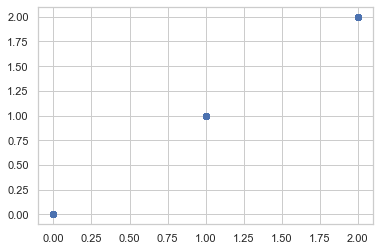

In [64]:
plt.scatter(y_test, Y_Pred_lsvc); #Linear SVC seems good

In [65]:
import pickle 
file = open('model.pkl', 'wb') # open a file, where you ant to store the data
pickle.dump(lsvc, file) #dump information to that file 